In [1]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
session = fastf1.get_session(2025, 'Australian Grand Prix', 'R')
session.load()  

req         WARNING 	DEFAULT CACHE ENABLED! (227.71 MB) /Users/illiapolishchuk/Library/Caches/fastf1
core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Usin

In [48]:
selected_drivers = ["NOR", "LEC", "HAM"]
filtered_laps = session.laps[session.laps["Driver"].isin(selected_drivers)]
lap_data = filtered_laps[["LapNumber", "Driver", "LapTime", "Compound"]]
lap_data["LapTime"] = lap_data["LapTime"].dt.total_seconds()
comparison_table = lap_data.pivot(index="LapNumber", columns="Driver", values=["LapTime", "Compound"])
comparison_table.head(10)

/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_85624/936114850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_data["LapTime"] = lap_data["LapTime"].dt.total_seconds()


LapTime                        Compound                            
Driver         HAM      LEC      NOR           HAM           LEC           NOR
LapNumber                                                                     
1.0            NaN      NaN      NaN  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
2.0            NaN      NaN      NaN  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
3.0            NaN      NaN      NaN  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
4.0            NaN      NaN      NaN  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
5.0        141.772  142.597  143.648  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
6.0        140.418   138.85  140.423  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
7.0        127.498  133.209  137.108  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
8.0         98.311    98.19   96.278  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
9.0         96.242   94.933   94.638  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE
10.0        95.107   93.539    92.13  INTERMEDIATE  INTERMEDIATE  INTERMEDIATE

In [49]:
lec_laps = session.laps.pick_drivers('LEC')
df_lec = lec_laps[['LapNumber', 'LapTime', 'Compound', 'TyreLife', 'Stint', 'Position']]
df_lec['LapTime'] = df_lec['LapTime'].dt.total_seconds() 
display(df_lec.head(10))

/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_85624/2811374812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lec['LapTime'] = df_lec['LapTime'].dt.total_seconds()


,LapNumber,LapTime,Compound,TyreLife,Stint,Position
204,1.0,NaN,INTERMEDIATE,1.0,1.0,8.0
205,2.0,NaN,INTERMEDIATE,2.0,1.0,5.0
206,3.0,NaN,INTERMEDIATE,3.0,2.0,5.0
207,4.0,NaN,INTERMEDIATE,4.0,3.0,5.0
208,5.0,142.597,INTERMEDIATE,5.0,4.0,5.0
209,6.0,138.850,INTERMEDIATE,6.0,4.0,5.0
210,7.0,133.209,INTERMEDIATE,7.0,4.0,5.0
211,8.0,98.190,INTERMEDIATE,8.0,4.0,5.0
212,9.0,94.933,INTERMEDIATE,9.0,4.0,5.0
213,10.0,93.539,INTERMEDIATE,10.0,4.0,5.0


In [50]:
nor_laps = session.laps.pick_drivers('NOR')
df_nor = nor_laps[['LapNumber', 'LapTime', 'Compound', 'TyreLife', 'Stint', 'Position']]
df_nor['LapTime'] = df_nor['LapTime'].dt.total_seconds() 
display(df_nor.head(10))

/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_85624/3971547214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nor['LapTime'] = df_nor['LapTime'].dt.total_seconds()


,LapNumber,LapTime,Compound,TyreLife,Stint,Position
593,1.0,NaN,INTERMEDIATE,1.0,1.0,1.0
594,2.0,NaN,INTERMEDIATE,2.0,1.0,1.0
595,3.0,NaN,INTERMEDIATE,3.0,2.0,1.0
596,4.0,NaN,INTERMEDIATE,4.0,3.0,1.0
597,5.0,143.648,INTERMEDIATE,5.0,4.0,1.0
598,6.0,140.423,INTERMEDIATE,6.0,4.0,1.0
599,7.0,137.108,INTERMEDIATE,7.0,4.0,1.0
600,8.0,96.278,INTERMEDIATE,8.0,4.0,1.0
601,9.0,94.638,INTERMEDIATE,9.0,4.0,1.0
602,10.0,92.130,INTERMEDIATE,10.0,4.0,1.0


In [51]:
ham_laps = session.laps.pick_drivers('HAM')
df_ham = ham_laps[['LapNumber', 'LapTime', 'Compound', 'TyreLife', 'Stint', 'Position']]
df_ham['LapTime'] = df_ham['LapTime'].dt.total_seconds() 
display(df_ham.head(10))

/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_85624/54709634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['LapTime'] = df_ham['LapTime'].dt.total_seconds()


,LapNumber,LapTime,Compound,TyreLife,Stint,Position
650,1.0,NaN,INTERMEDIATE,1.0,1.0,11.0
651,2.0,NaN,INTERMEDIATE,2.0,1.0,8.0
652,3.0,NaN,INTERMEDIATE,3.0,2.0,8.0
653,4.0,NaN,INTERMEDIATE,4.0,3.0,8.0
654,5.0,141.772,INTERMEDIATE,5.0,4.0,8.0
655,6.0,140.418,INTERMEDIATE,6.0,4.0,8.0
656,7.0,127.498,INTERMEDIATE,7.0,4.0,8.0
657,8.0,98.311,INTERMEDIATE,8.0,4.0,8.0
658,9.0,96.242,INTERMEDIATE,9.0,4.0,8.0
659,10.0,95.107,INTERMEDIATE,10.0,4.0,8.0


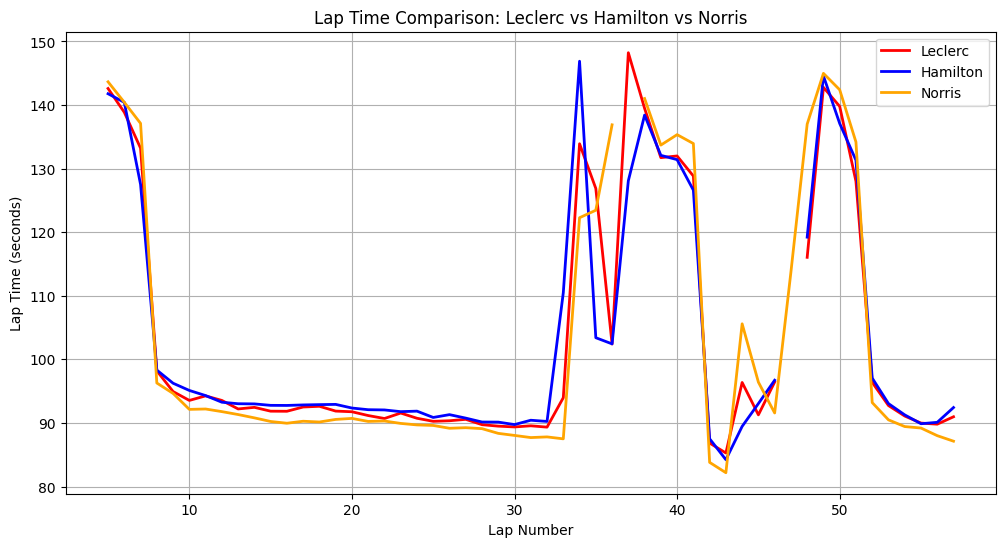

In [42]:
df_comparison = df_lec.merge(df_ham, on="LapNumber", suffixes=("_LEC", "_HAM"))
df_comparison = df_comparison.merge(df_nor, on="LapNumber", suffixes=("", "_NOR"))
df_comparison.rename(columns={"LapTime": "LapTime_NOR"}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(df_comparison["LapNumber"], df_comparison["LapTime_LEC"], label="Leclerc", color="red", linewidth=2)
plt.plot(df_comparison["LapNumber"], df_comparison["LapTime_HAM"], label="Hamilton", color="blue", linewidth=2)
plt.plot(df_comparison["LapNumber"], df_comparison["LapTime_NOR"], label="Norris", color="orange", linewidth=2)

plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Lap Time Comparison: Leclerc vs Hamilton vs Norris")
plt.legend()
plt.grid(True)

plt.show()


In [52]:
df_trimmed = df_comparison[["LapNumber", "LapTime_LEC", "LapTime_HAM", "LapTime_NOR"]]

display(df_trimmed.head(10))


,LapNumber,LapTime_LEC,LapTime_HAM,LapTime_NOR
0,1.0,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN
4,5.0,142.597,141.772,143.648
5,6.0,138.850,140.418,140.423
6,7.0,133.209,127.498,137.108
7,8.0,98.190,98.311,96.278
8,9.0,94.933,96.242,94.638
9,10.0,93.539,95.107,92.130


In [56]:
drivers = ["LEC", "HAM", "NOR"] 

lap_data = {}
for driver in drivers:
    driver_laps = session.laps.pick_driver(driver)
    lap_data[driver] = driver_laps[['LapTime', 'Compound']].dropna() 

avg_lap_times = {}
for driver in lap_data:
    avg_lap_times[driver] = (
        lap_data[driver]
        .groupby('Compound')['LapTime']
        .mean()
        .dt.total_seconds() 
    )

df_avg_lap_times = pd.DataFrame(avg_lap_times)

print(df_avg_lap_times)

                     LEC         HAM         NOR
Compound                                        
HARD          113.806333  112.326846  119.541111
INTERMEDIATE  100.358025  100.439205   99.737930


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
